# <center> Assignment 1 </center>

#### Name: Tomi Petrov

#### Student ID: 180638460

### You are given a list of target values of a binary classification problem, and 2 lists of corresponding predicted scores from 2 models (Model_1 and Model_2). Please evaluate the preformance of the models in the following aspects. You are allowed to use python machine learning packages, such as sklearn.

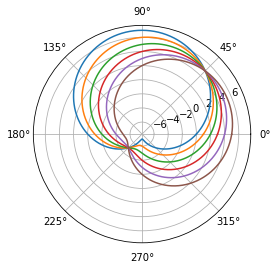

In [6]:
import matplotlib.pyplot as plot
import numpy as nmp

x = nmp.array([0,1,2,3,4,5])
y = nmp.array([7,6,5,4,3,2])

theta = nmp.arange(0,2*nmp.pi,0.01)

plot.axes(projection = "polar")

for i in range(len(x)):
    rho = x[i]*nmp.cos(theta) + y[i]*nmp.sin(theta)
    plot.plot(theta,rho)

plot.show()

In [17]:
### Read the target values and predicted scores into lists
def read_from_file(filename):
    file = open(filename, "r") 
    s = file.read()
    lines = s.split('\n')
    return [float(x) for x in lines]

target = read_from_file('target.csv')
pred_1 = read_from_file('pred_model1.csv')
pred_2 = read_from_file('pred_model2.csv')

### Question 1. Assume the target level 1 is positive, and 0 is negative. Given a threshold 0.25, show the confusion matrix for each model.

In [18]:
from sklearn.metrics import confusion_matrix

threshold = 0.25
for x in range(len(pred_1)):
    if(pred_1[x] > threshold):
        pred_1[x] = 1
        
    else:
        pred_1[x] = 0

for y in range(len(pred_2)):
    if(pred_2[y] > threshold):
        pred_2[y] = 1
        
    else:
        pred_2[y] = 0

print("confusion matrix for model 1:")        
print(confusion_matrix(target, pred_1))
print("confusion matrix for model 2:")
print(confusion_matrix(target, pred_2))

confusion matrix for model 1:
[[1668   25]
 [ 434  538]]
confusion matrix for model 2:
[[1629   64]
 [ 349  623]]


### Question 2. For each model, what are the following values? TPR, FPR, TNR, FNR, Precision, Recall, F1-measure.

In [19]:
from sklearn.metrics import f1_score

tn1, fp1, fn1, tp1 = confusion_matrix(target, pred_1).ravel()
tpr1 = tp1/(fn1 + tp1)
tnr1 = tn1/(tn1 + fp1)
fpr1 = fp1/(tn1 + fp1)
fnr1 = fn1/(fn1 + tp1)

percision1 = tp1/(tp1 + fp1)
recall1 = tp1/(tp1 + fn1)
f11 = f1_score(target, pred_1)

print("Values for model 1:") 
print("TPR: {}  FPR: {}  TNR: {}  FNR: {}".format(tpr1, fpr1, tnr1, fnr1))
print("percision: {}  recall: {}  f1: {}".format(percision1, recall1, f11))

tn2, fp2, fn2, tp2 = confusion_matrix(target, pred_2).ravel()
tpr2 = tp2/(fn2 + tp2)
tnr2 = tn2/(tn2 + fp2)
fpr2 = fp2/(tn2 + fp2)
fnr2 = fn2/(fn2 + tp2)

percision2 = tp2/(tp2 + fp2)
recall2 = tp2/(tp2 + fn2)
f12 = f1_score(target, pred_2)

print("Values for model 2:") 
print("TPR: {}  FPR: {}  TNR: {}  FNR: {}".format(tpr2, fpr2, tnr2, fnr2))
print("percision: {}  recall: {}  f1: {}".format(percision2, recall2, f12))

Values for model 1:
TPR: 0.5534979423868313  FPR: 0.014766686355581808  TNR: 0.9852333136444182  FNR: 0.44650205761316875
percision: 0.955595026642984  recall: 0.5534979423868313  f1: 0.7009771986970683
Values for model 2:
TPR: 0.6409465020576132  FPR: 0.03780271707028943  TNR: 0.9621972829297105  FNR: 0.35905349794238683
percision: 0.9068413391557496  recall: 0.6409465020576132  f1: 0.751054852320675


### Question 3. Draw ROC curves of the models. 

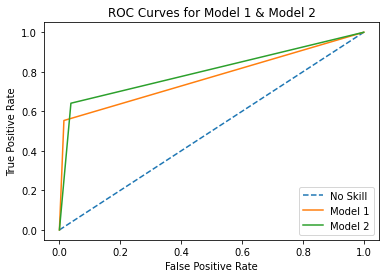

In [20]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
ns_probs = [0 for _ in range(len(testy))]
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = 'No Skill')

fpr, tpr, threshold = roc_curve(target, pred_1)
plt.plot(fpr, tpr, label = 'Model 1')

fpr, tpr, threshold = roc_curve(target, pred_2)
plt.plot(fpr, tpr, label = 'Model 2')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Model 1 & Model 2')
plt.legend(loc = "lower right")
plt.show()

### Question 4. For each model, what is the value of the ROC Index? Which model has better performance according to ROC Index? 

In [21]:
from sklearn.metrics import roc_auc_score

ns_index = roc_auc_score(testy, ns_probs)
lr1_index = roc_auc_score(target, pred_1)
lr2_index = roc_auc_score(target, pred_2)

print("No Skill: ROC index = %.3f" % (ns_index))
print("Model 1: ROC index = %.3f" % (lr1_index))
print("Model 2: ROC index = %.3f" % (lr2_index))
print("According to the ROC index, model 2 preforms better because its score is better, as 0.802 > 0.769")

No Skill: ROC index = 0.500
Model 1: ROC index = 0.769
Model 2: ROC index = 0.802
According to the ROC index, model 2 preforms better because its score is better, as 0.802 > 0.769


### Question 5. For each model, what is the value of the K-S statistics ? Which model has better performance according to the K-S statistics? 

In [22]:
from scipy import stats

print("Model 1: K-S stat = {}".format(stats.ks_2samp(pred_1, ns_probs)[0]))
print("Model 2: K-S stat = {}".format(stats.ks_2samp(pred_2, ns_probs)[0]))
print("Model 1 in comparison to Model 2: K-S stat = {}".format(stats.ks_2samp(pred_1, pred_2)[0]))
print("According to the K-S statistic, model 2 preforms better because its score is better, as 0.258 > 0.211")

Model 1: K-S stat = 0.21125703564727955
Model 2: K-S stat = 0.2577861163227017
Model 1 in comparison to Model 2: K-S stat = 0.04652908067542214
According to the K-S statistic, model 2 preforms better because its score is better, as 0.258 > 0.211
